In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

In [2]:
# inputs
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)

# labels
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [3]:
df_in_lab = pd.DataFrame({'xs':xs, 'ys':ys})

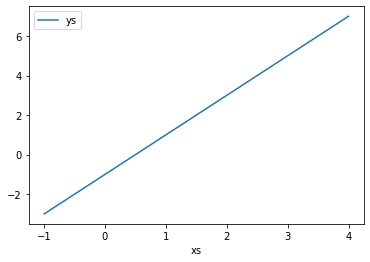

In [9]:
df_in_lab.plot(x='xs', y='ys')

In [5]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=500,verbose=0)

print(model.predict([10.0]))

[[18.977877]]


In [6]:
def my_huber_loss(y_true, y_pred):
    threshold = 1
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= threshold
    small_error_loss = tf.square(error) / 2
    big_error_loss = threshold * (tf.abs(error) - (0.5 * threshold))
    return tf.where(is_small_error, small_error_loss, big_error_loss)

In [7]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss=my_huber_loss)
model.fit(xs, ys, epochs=500,verbose=0)
print(model.predict([10.0]))

[[18.388885]]


In [11]:
from tensorflow.keras.losses import mean_squared_error

In [15]:
help(mean_squared_error)

Help on function mean_squared_error in module tensorflow.python.keras.losses:

mean_squared_error(y_true, y_pred)
    Computes the mean squared error between labels and predictions.
    
    After computing the squared distance between the inputs, the mean value over
    the last dimension is returned.
    
    `loss = mean(square(y_true - y_pred), axis=-1)`
    
    Standalone usage:
    
    >>> y_true = np.random.randint(0, 2, size=(2, 3))
    >>> y_pred = np.random.random(size=(2, 3))
    >>> loss = tf.keras.losses.mean_squared_error(y_true, y_pred)
    >>> assert loss.shape == (2,)
    >>> assert np.array_equal(
    ...     loss.numpy(), np.mean(np.square(y_true - y_pred), axis=-1))
    
    Args:
      y_true: Ground truth values. shape = `[batch_size, d0, .. dN]`.
      y_pred: The predicted values. shape = `[batch_size, d0, .. dN]`.
    
    Returns:
      Mean squared error values. shape = `[batch_size, d0, .. dN-1]`.

